In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py    
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['font.size'] = 30
mpl.rcParams["figure.figsize"] = (15,10)
mpl.rcParams["mathtext.fontset"]='dejavuserif'



In [40]:
filename='../raw_ppxf_fits/pol0/stack_100.00_110.00_skyup_pPXF_mpoly0.hdf5' #degree 0

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array


    weights=f['weights'][()]
    ages=f['ages'][()]
    met=f['mets'][()]

    fit=f['fit'][()]
    fit_nopoly=f['fit_nopoly'][()]
    


Keys: <KeysViewHDF5 ['ages', 'fit', 'fit_nopoly', 'gas', 'mets', 'noise', 'spec', 'wave', 'weights']>
<class 'h5py._hl.dataset.Dataset'>


In [41]:
print(weights,np.shape(weights))

print(ages,np.shape(ages))

print(met,np.shape(met))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.

In [42]:
print(fit,np.shape(fit))

print(fit_nopoly,np.shape(fit_nopoly))

[0.73433547 0.73171323 0.73556953 ... 1.0899678  1.0875851  1.08656591] (1978,)
[0.73433547 0.73171323 0.73556953 ... 1.0899678  1.0875851  1.08656591] (1978,)


In [43]:
print(np.sum(weights))

1.0


In [4]:
import os

weights=[]
ages=[]
mets=[]
fit=[]

ppxf_dir='../results/pol0/'
files= sorted(os.listdir(ppxf_dir))
print(files)
for filename in files:
    with h5py.File(ppxf_dir+'/'+filename, "r") as f:
        weights.append(f['weights'][()])
        ages.append(f['ages'][()])
        mets.append(f['mets'][()])
        fit.append(f['fit'][()])
        

['stack_100.00_110.00_skyup_pPXF_mpoly0.hdf5', 'stack_110.00_120.00_skyup_pPXF_mpoly0.hdf5', 'stack_120.00_130.00_skyup_pPXF_mpoly0.hdf5', 'stack_130.00_140.00_skyup_pPXF_mpoly0.hdf5', 'stack_140.00_150.00_skyup_pPXF_mpoly0.hdf5', 'stack_150.00_160.00_skyup_pPXF_mpoly0.hdf5', 'stack_160.00_170.00_skyup_pPXF_mpoly0.hdf5', 'stack_170.00_180.00_skyup_pPXF_mpoly0.hdf5', 'stack_180.00_190.00_skyup_pPXF_mpoly0.hdf5', 'stack_190.00_200.00_skyup_pPXF_mpoly0.hdf5', 'stack_200.00_210.00_skyup_pPXF_mpoly0.hdf5', 'stack_210.00_220.00_skyup_pPXF_mpoly0.hdf5', 'stack_220.00_230.00_skyup_pPXF_mpoly0.hdf5', 'stack_230.00_240.00_skyup_pPXF_mpoly0.hdf5', 'stack_240.00_250.00_skyup_pPXF_mpoly0.hdf5', 'stack_250.00_260.00_skyup_pPXF_mpoly0.hdf5', 'stack_260.00_280.00_skyup_pPXF_mpoly0.hdf5', 'stack_280.00_320.00_skyup_pPXF_mpoly0.hdf5']


In [5]:

age=[]
weight=[] 
met=[] #promediating in ages
m_weight=[] #promediating in ages
for i in range(18):
    age.append(np.mean(ages[i],axis=1))
    w=np.mean(weights[i],axis=1)
    weight.append(w/np.sum(w))
    met.append(np.mean(mets[i],axis=0))
    w=np.mean(weights[i],axis=0)
    m_weight.append(w/np.sum(w))



# to transform from lookback time to cosmic time
ages_ok=np.array(14-np.array(age))[:,::-1] 
weights_ok=np.array(weight)[:,::-1]



In [110]:
print(age[0])
print(weight)
print(ages_ok)
print(weights_ok)

[ 0.50  0.60  0.70  0.80  0.90  1.00  1.25  1.50  1.75  2.00  2.25  2.50
  2.75  3.00  3.25  3.50  3.75  4.00  4.50  5.00  5.50  6.00  6.50  7.00
  7.50  8.00  8.50  9.00  9.50 10.00 10.50 11.00 11.50 12.00 12.50 13.00
 13.50 14.00]
[array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.01, 0.06, 0.27, 0.65]), array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 4.70e-04, 1.16e-02, 5.86e-02,
       2.75e-01, 6.54e-01]), array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
    

In [6]:
percent_ppxf=[]
for j in range(18):
    mcurve=weights_ok[j]
    m=[]
    percent=[]
    for a in range(len(mcurve)):
        m.append(np.sum(mcurve[:a+1]))
    for b in range(1,10):
        ind=np.argmin(abs(np.array(m)-b/10))
        percent.append(ages_ok[j][ind])
    percent_ppxf.append(percent)

In [7]:
print(percent_ppxf)

print(percent_ppxf[0])
print(percent_ppxf[10])
print(percent_ppxf[17])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]


(38,) (38,)


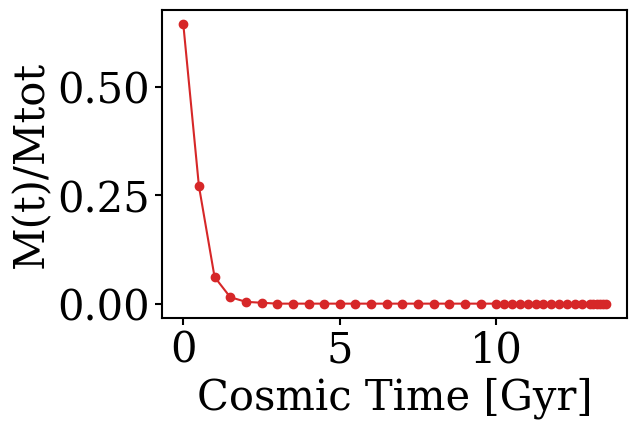

(38,) (38,)


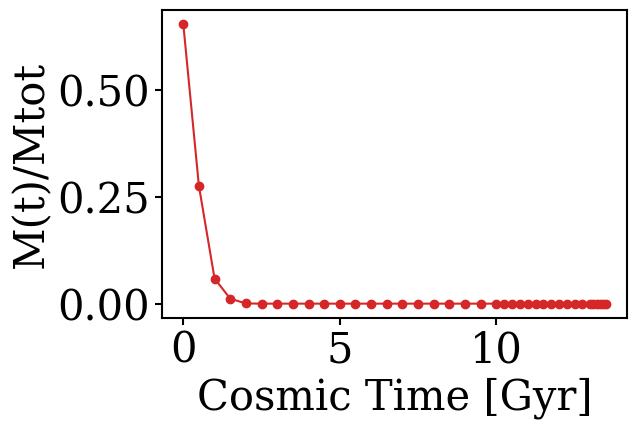

(38,) (38,)


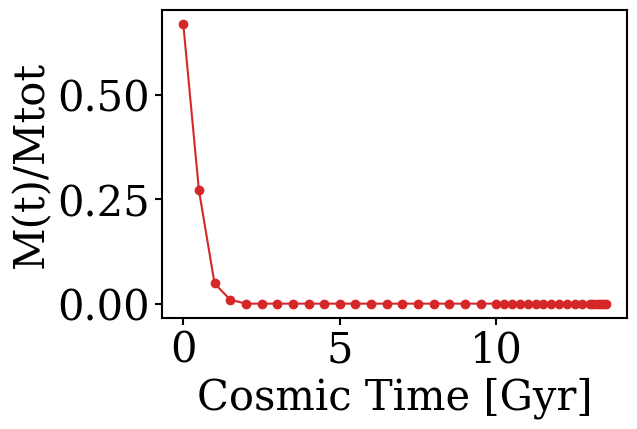

(38,) (38,)


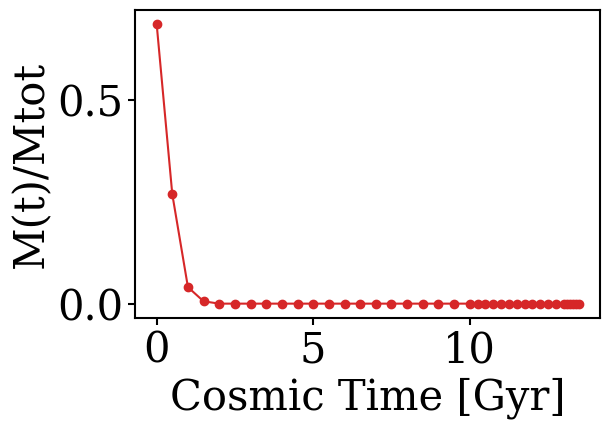

(38,) (38,)


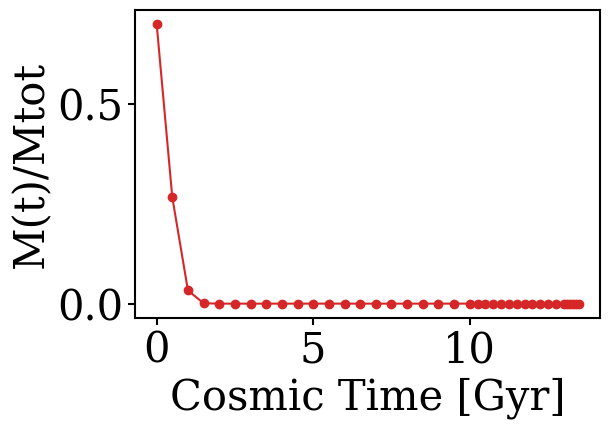

(38,) (38,)


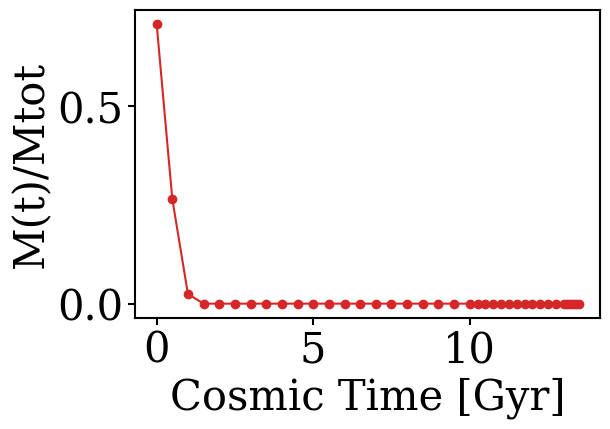

(38,) (38,)


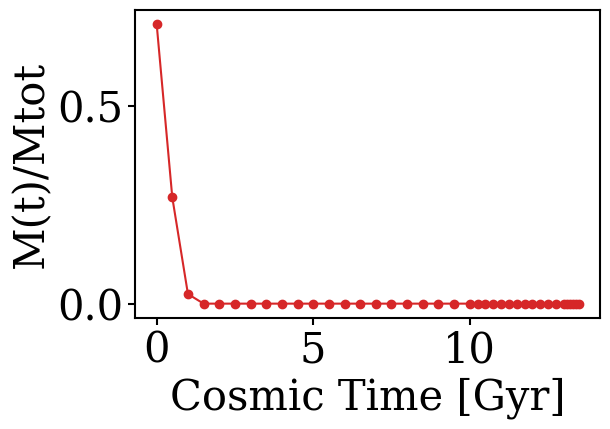

(38,) (38,)


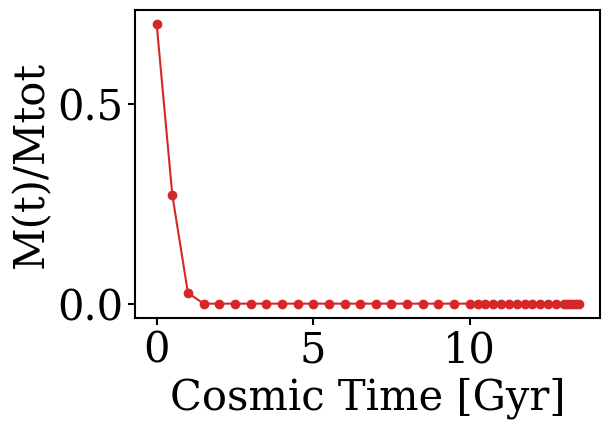

(38,) (38,)


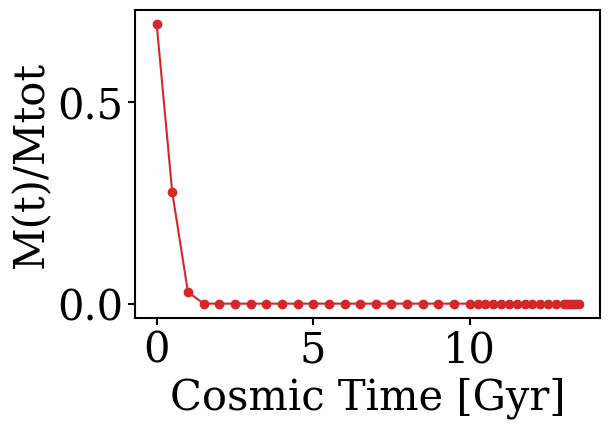

(38,) (38,)


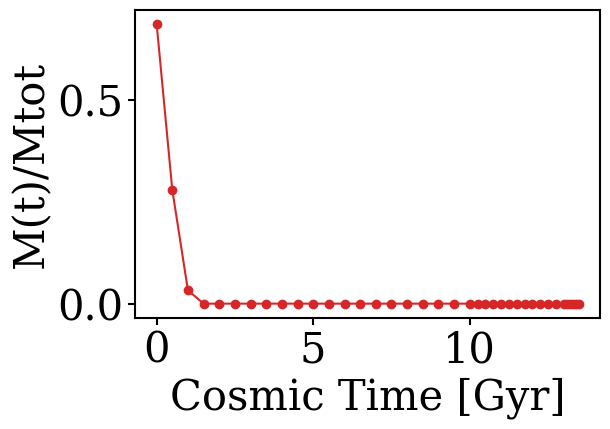

(38,) (38,)


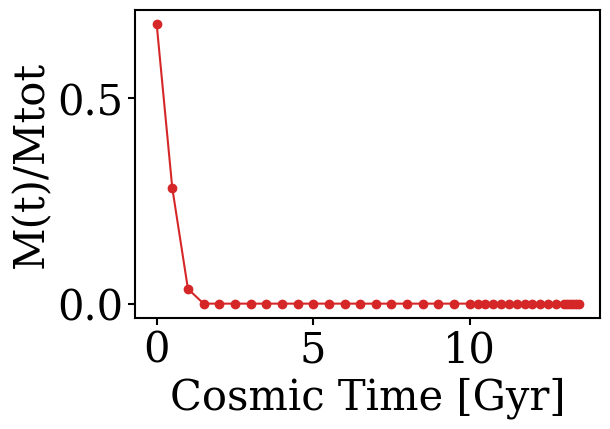

(38,) (38,)


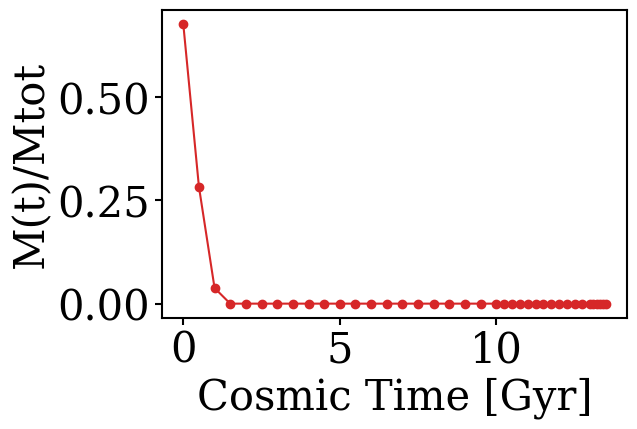

(38,) (38,)


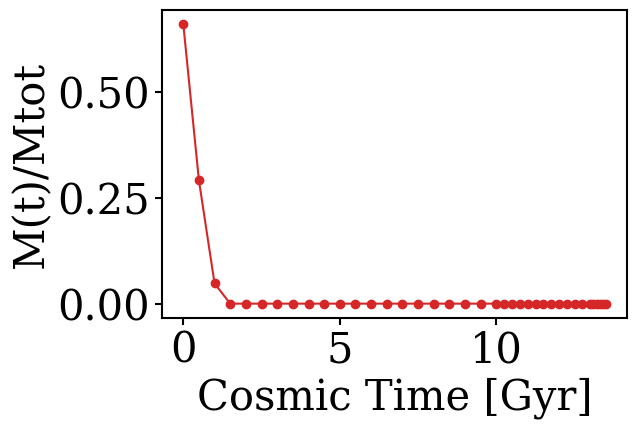

(38,) (38,)


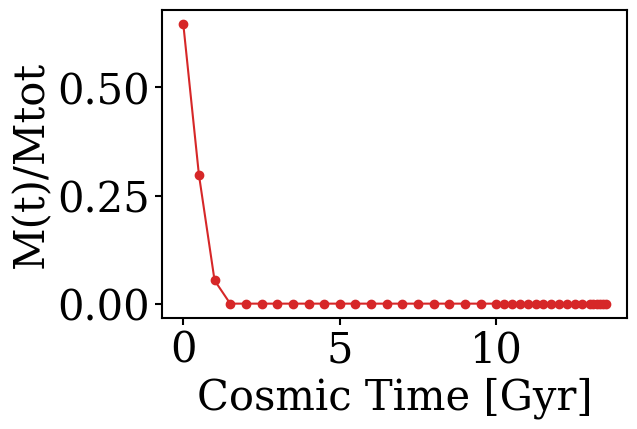

(38,) (38,)


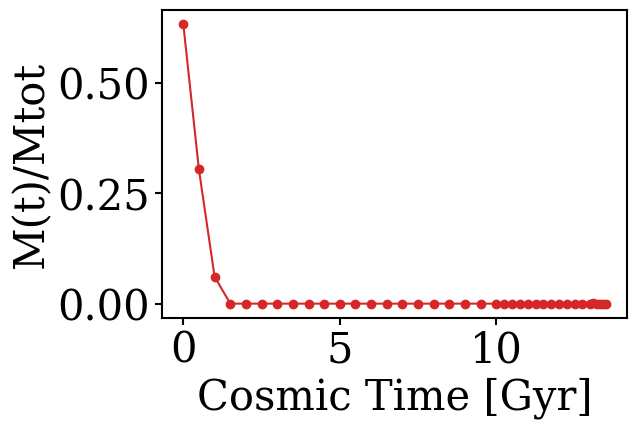

(38,) (38,)


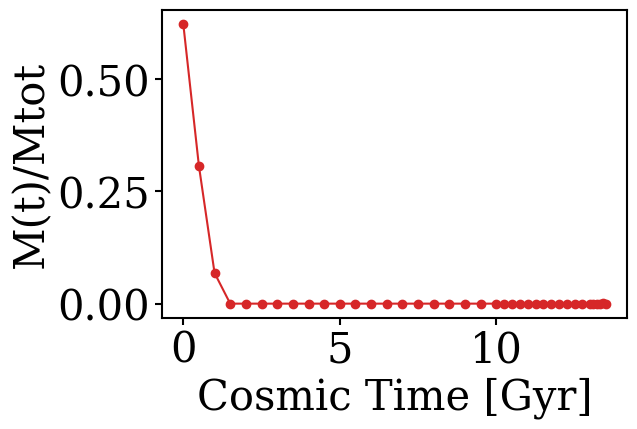

(38,) (38,)


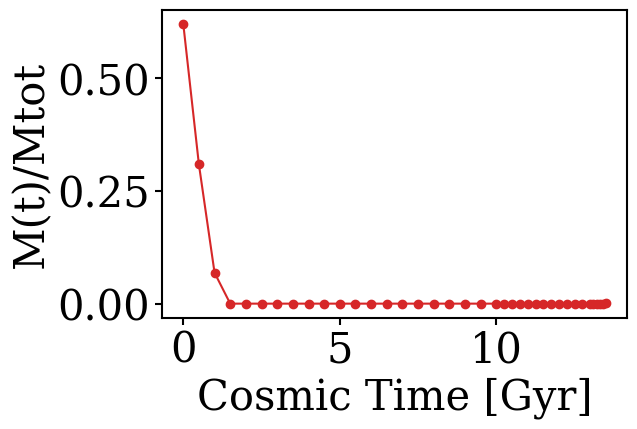

(38,) (38,)


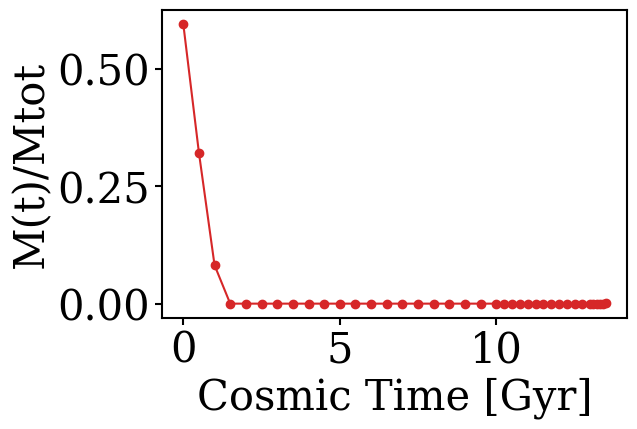

(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)
(38,) (38,)


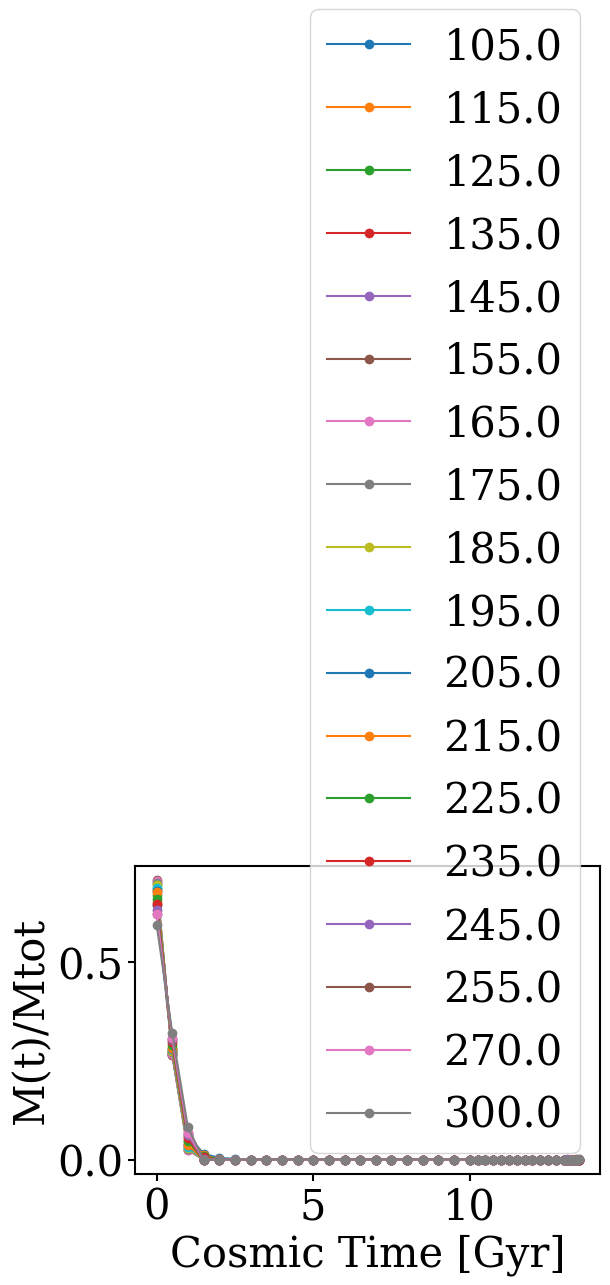

In [112]:
for i in range(18):
    plt.figure(figsize=(6,4))
    print(np.shape(ages_ok[i]),np.shape(weights_ok[i]))
    plt.plot(ages_ok[i],weights_ok[i],'-o',color='tab:red')
    plt.xlabel('Cosmic Time [Gyr]')
    plt.ylabel('M(t)/Mtot')
    plt.show()

plt.figure(figsize=(6,4))
for i in range(18):
    print(np.shape(ages_ok[i]),np.shape(weights_ok[i]))
    plt.plot(ages_ok[i],weights_ok[i],'-o',label=str(sigma_gal[i]))
plt.xlabel('Cosmic Time [Gyr]')
plt.ylabel('M(t)/Mtot')
plt.legend()
plt.show()

In [11]:
np.set_printoptions(precision=4,floatmode='fixed')
post_median=np.load('./post_median.npy')
post_stds=np.load('./post_stds.npy')

mets_ppxf=np.around(np.sum(np.array(met)*np.array(m_weight),axis=1),4)
mets_you=np.around(post_median[:,-1],3)
mets_you_err=np.around(2*post_stds[:,-1],2)

sigma_gal=np.load('../data/sigma_obs.npy')

In [12]:
print(np.sum(np.array(met[1])*np.array(m_weight[1])))
print(mets_ppxf) #pues las metalicidades promedio tmpc son muy altas para ppxf
print(mets_you)

print(ages[0])

-0.12050951000712605
[-0.1524 -0.1205 -0.0893 -0.0593 -0.0339 -0.0069  0.0164  0.0366  0.0571
  0.0795  0.0934  0.1120  0.1280  0.1407  0.1643  0.1817  0.1918  0.2359]
[ 0.1060  0.1180 -0.0300 -0.1020  0.0540 -0.0400  0.0010 -0.0580 -0.0750
 -0.0100 -0.0110 -0.0410 -0.0910  0.0650  0.0400  0.0590 -0.1400  0.1180]
[[ 0.5000  0.5000  0.5000  0.5000  0.5000  0.5000  0.5000  0.5000  0.5000
   0.5000]
 [ 0.6000  0.6000  0.6000  0.6000  0.6000  0.6000  0.6000  0.6000  0.6000
   0.6000]
 [ 0.7000  0.7000  0.7000  0.7000  0.7000  0.7000  0.7000  0.7000  0.7000
   0.7000]
 [ 0.8000  0.8000  0.8000  0.8000  0.8000  0.8000  0.8000  0.8000  0.8000
   0.8000]
 [ 0.9000  0.9000  0.9000  0.9000  0.9000  0.9000  0.9000  0.9000  0.9000
   0.9000]
 [ 1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
   1.0000]
 [ 1.2500  1.2500  1.2500  1.2500  1.2500  1.2500  1.2500  1.2500  1.2500
   1.2500]
 [ 1.5000  1.5000  1.5000  1.5000  1.5000  1.5000  1.5000  1.5000  1.5000
   1.5000]
 [ 1.

In [14]:
print(mets_ppxf[0])
print(mets_ppxf[10])
print(mets_ppxf[17])

-0.1524
0.0934
0.2359


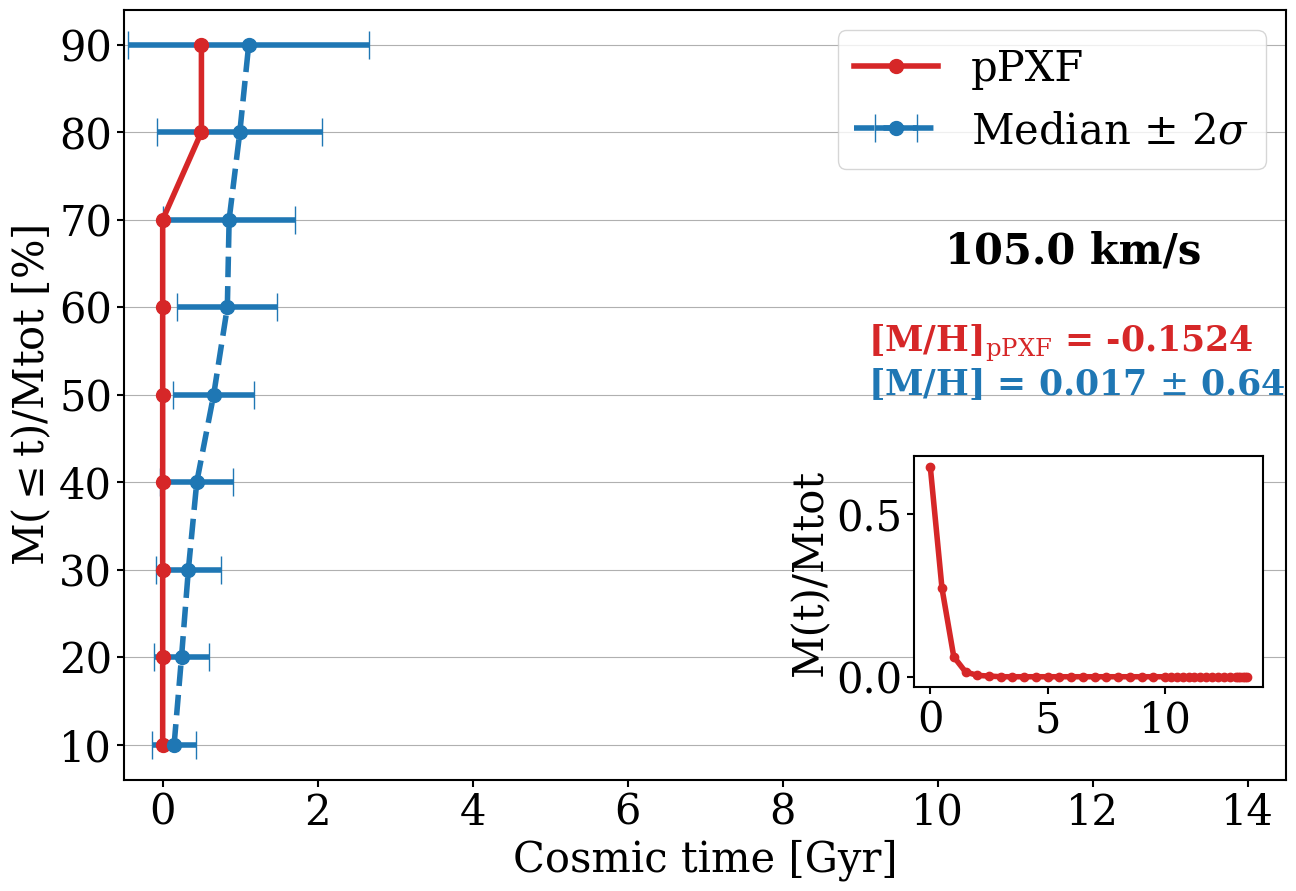

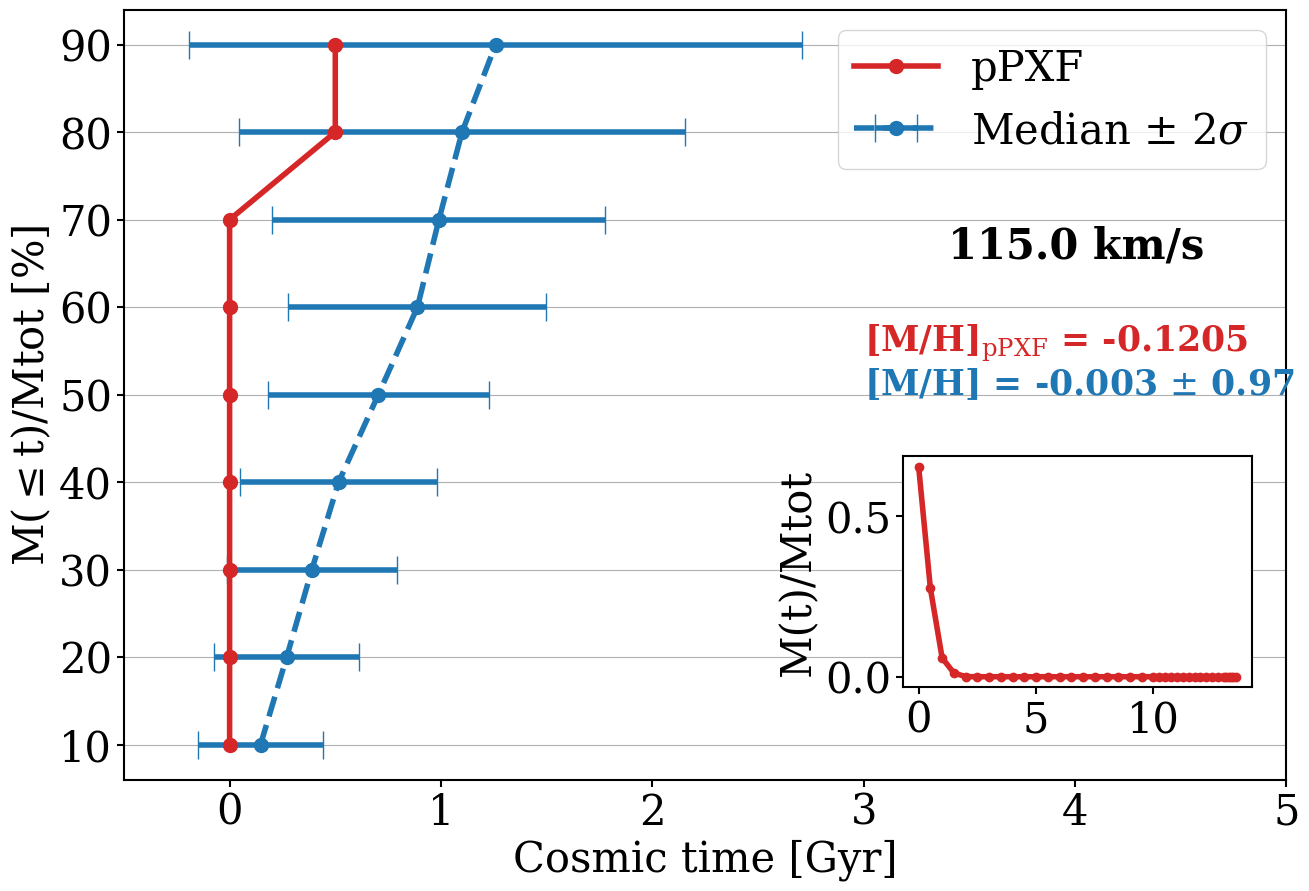

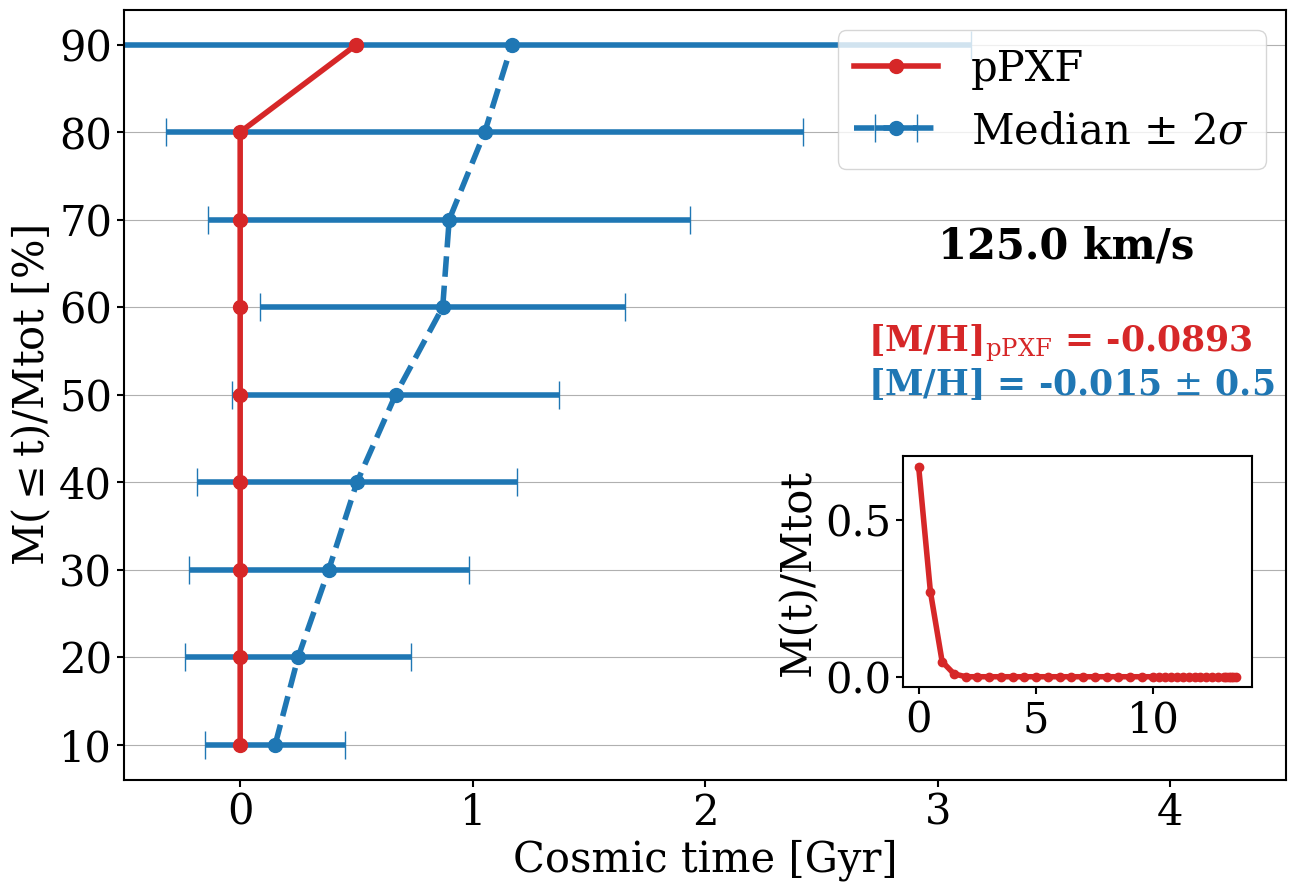

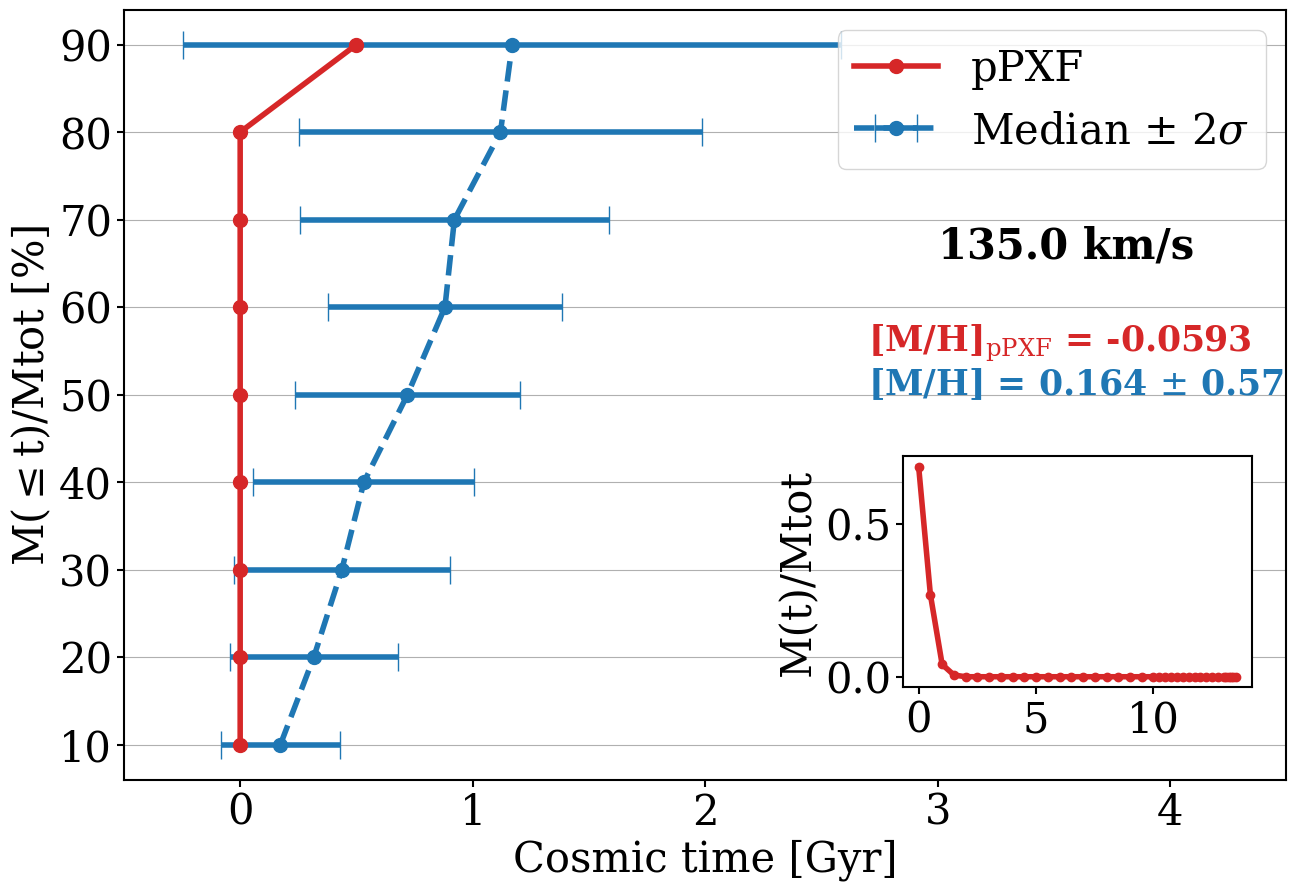

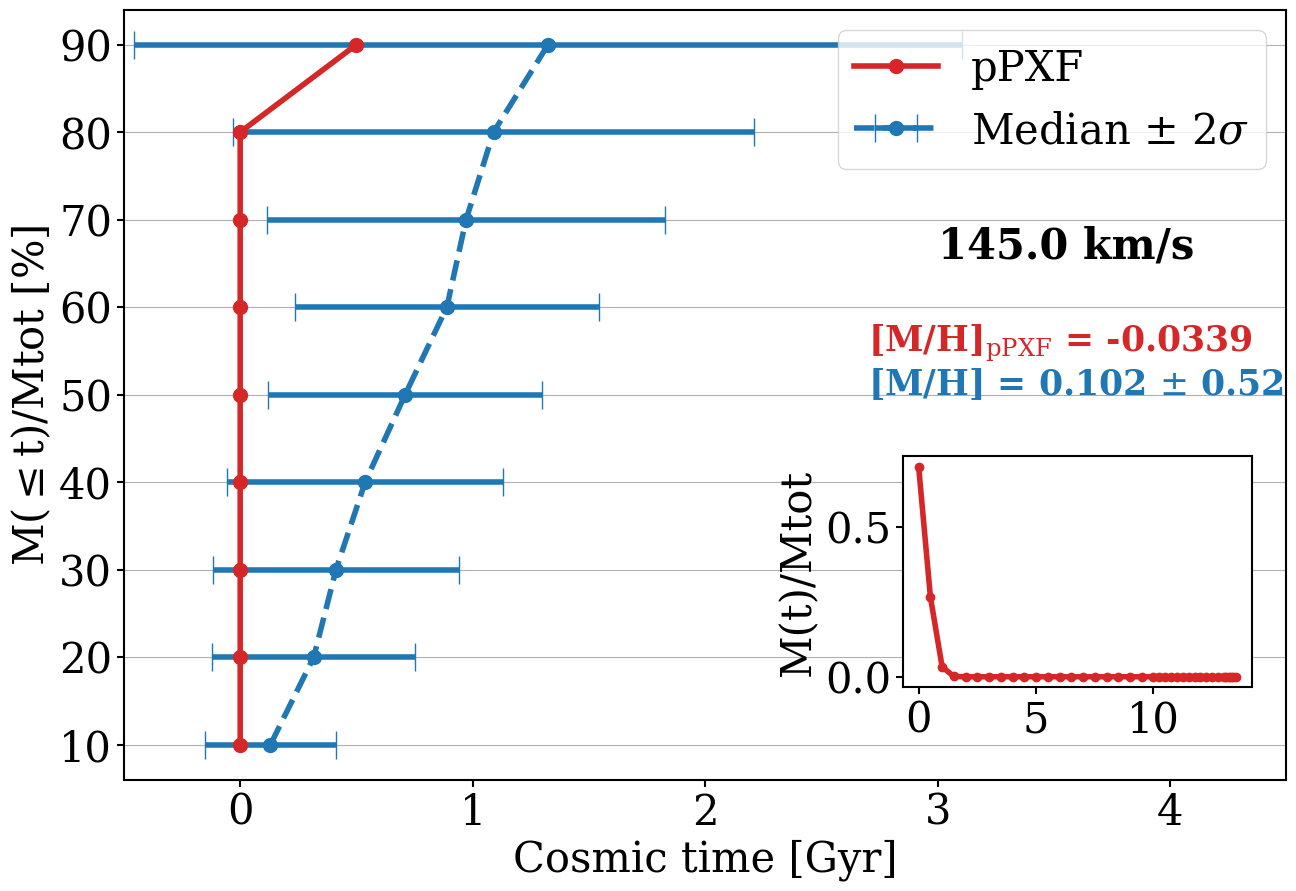

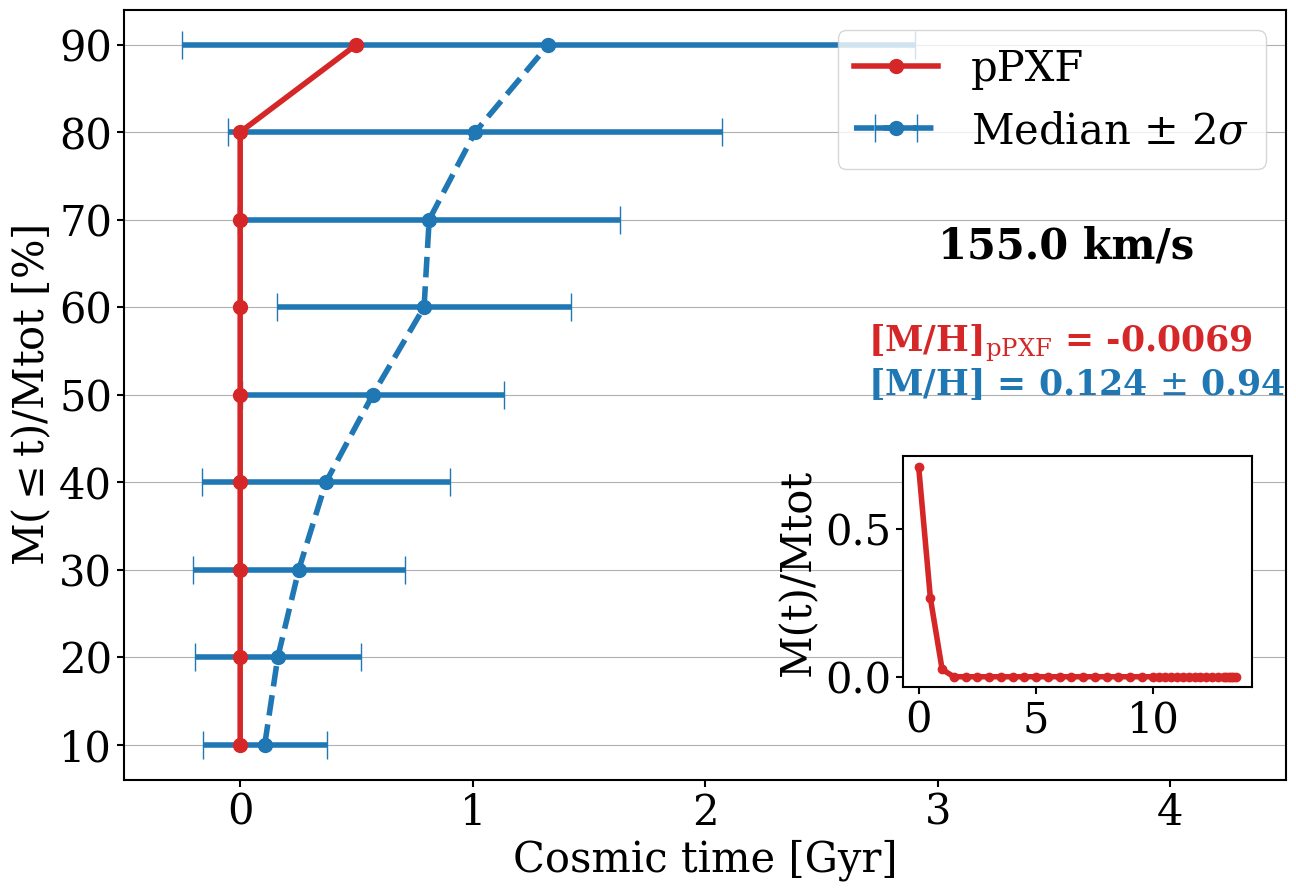

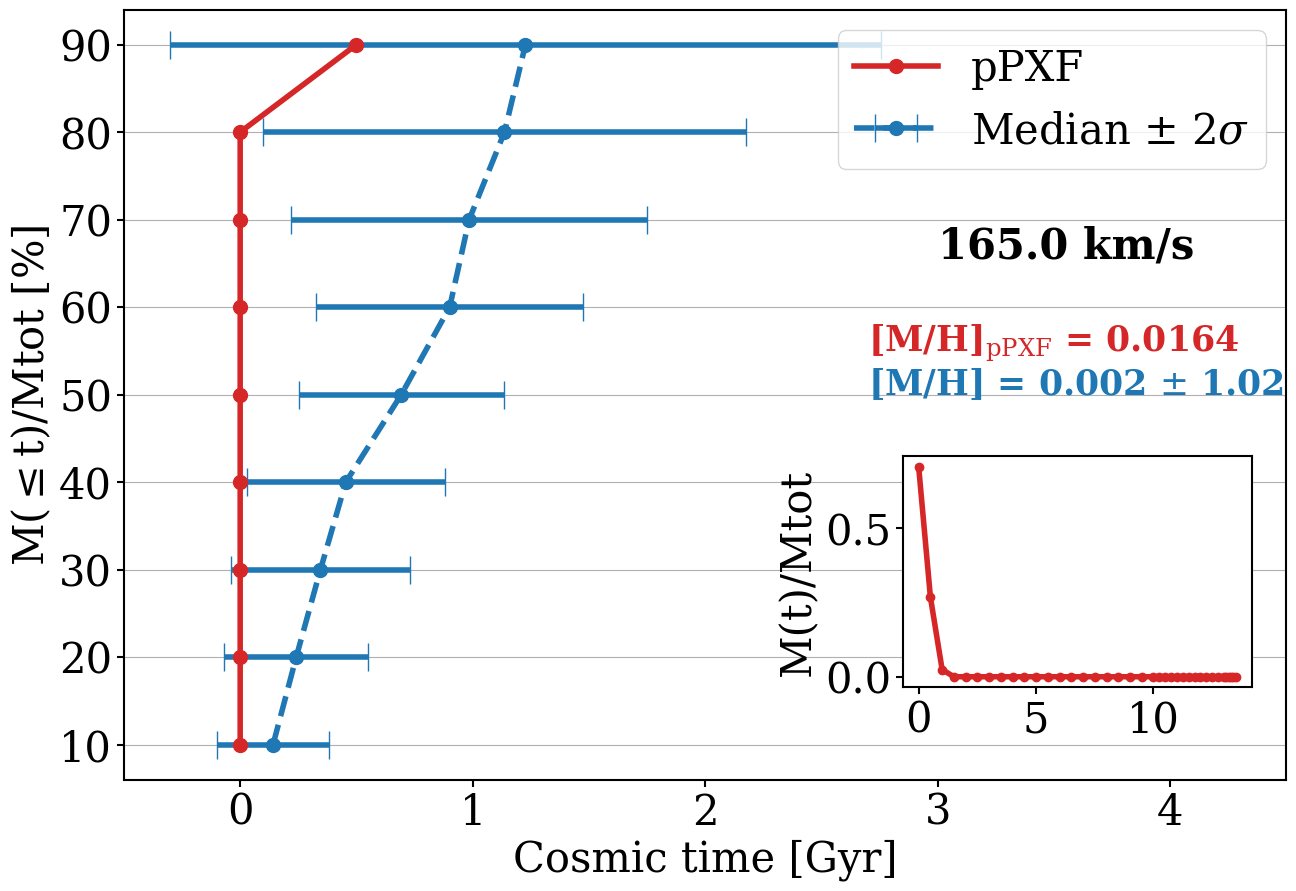

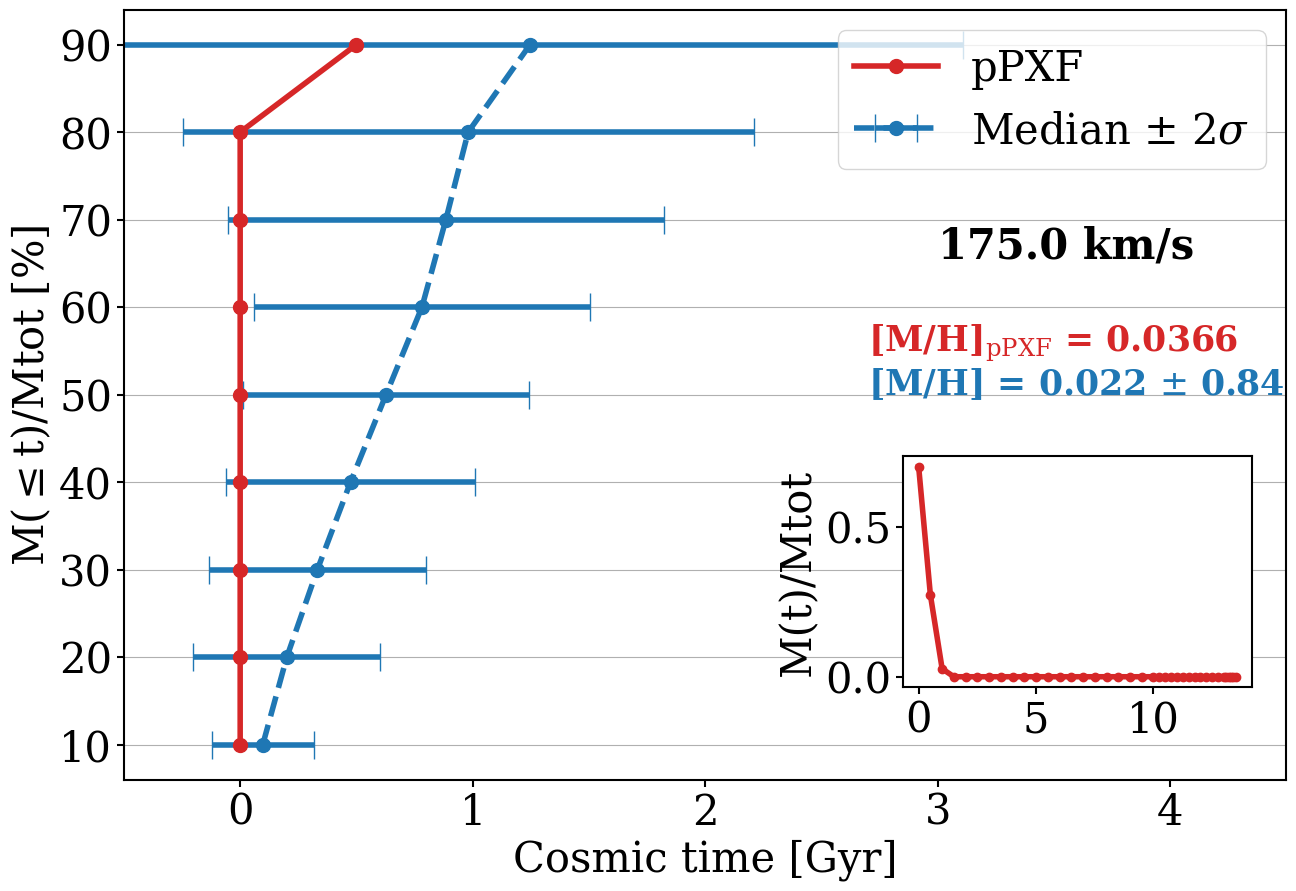

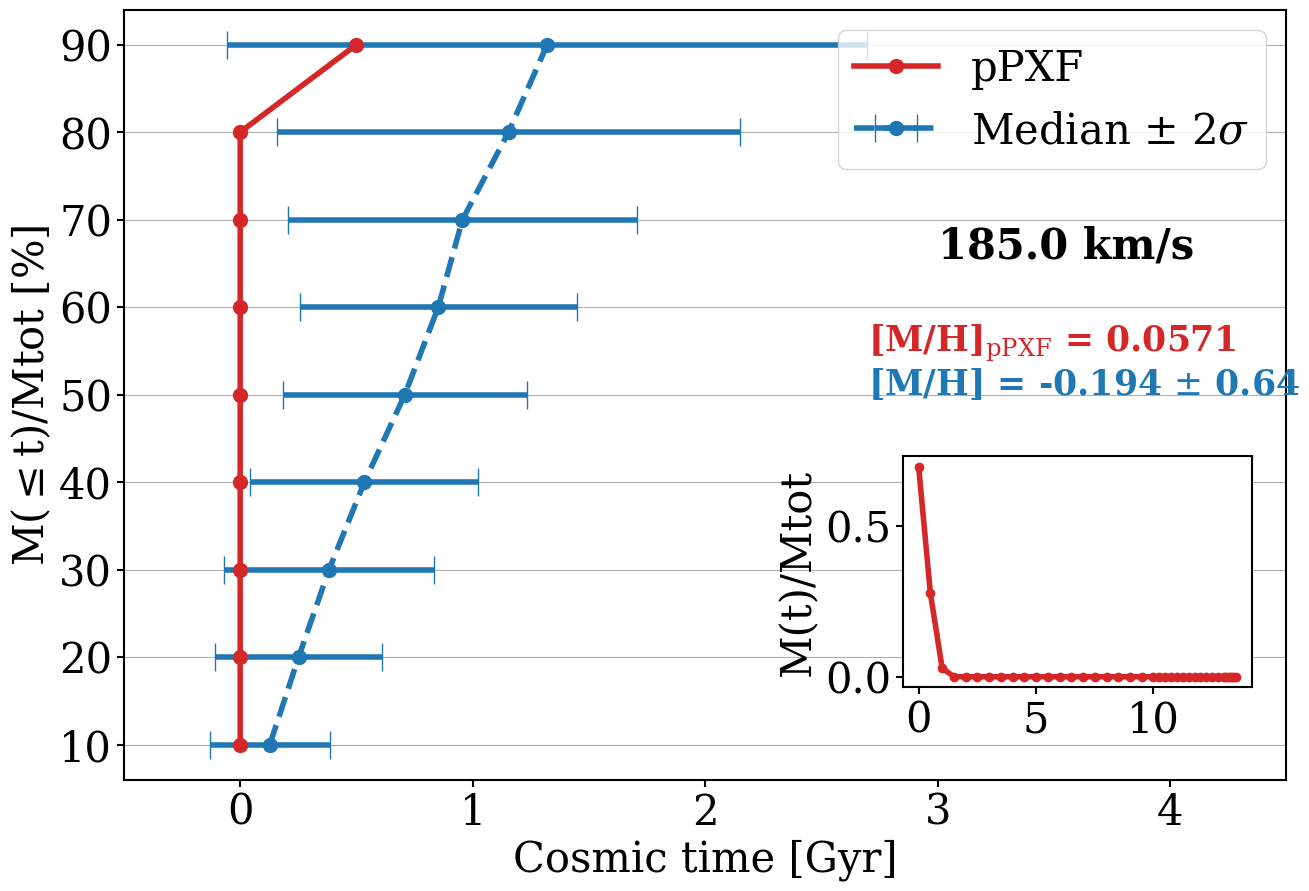

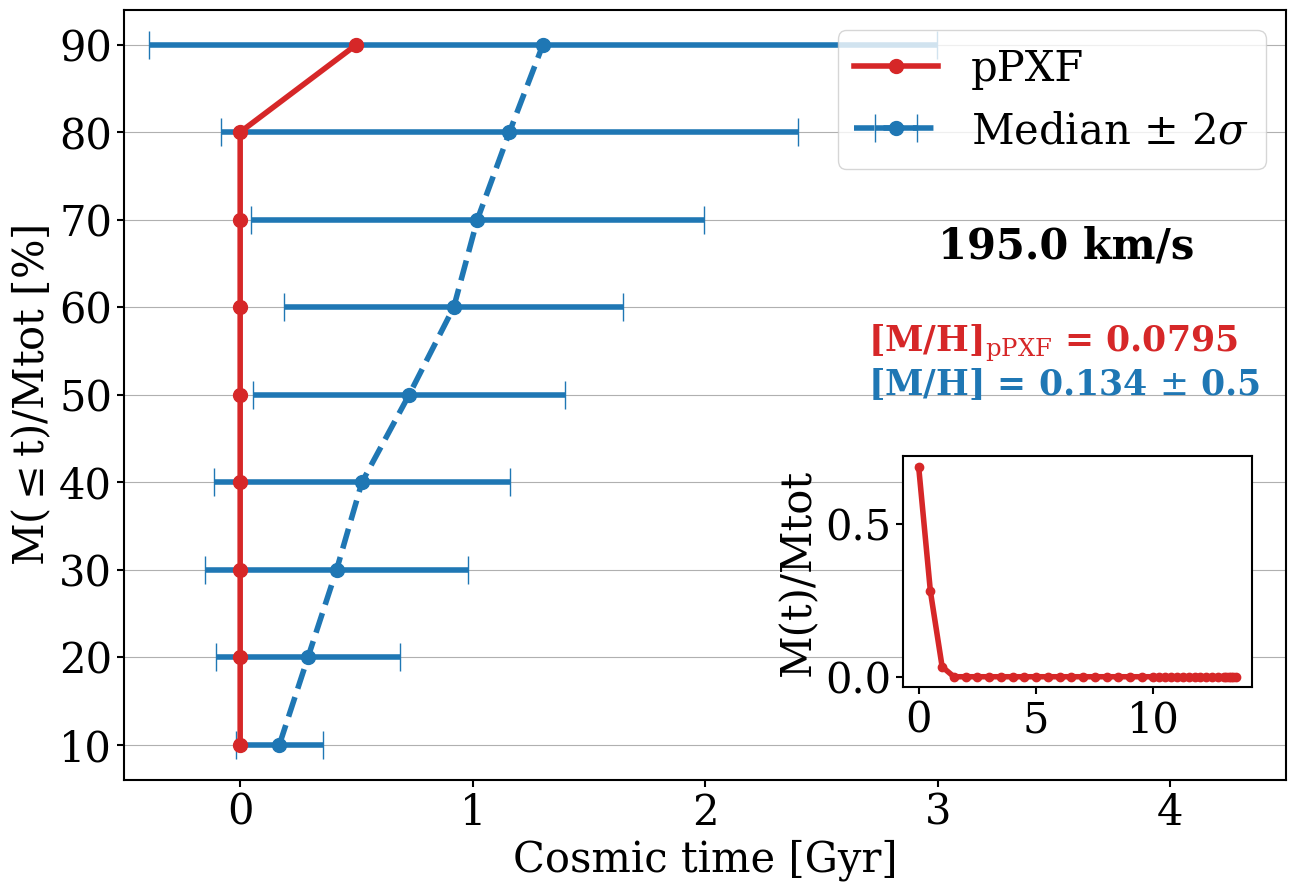

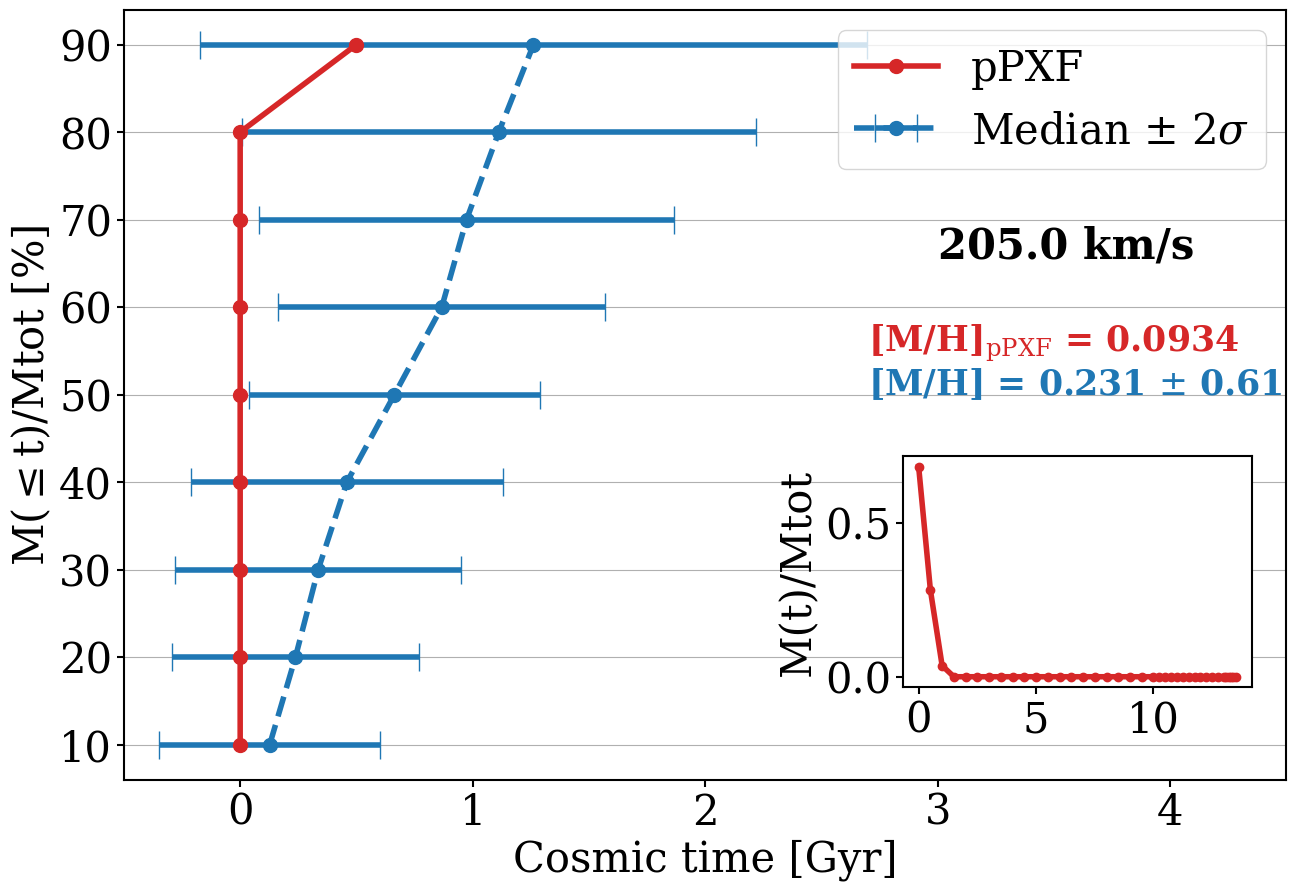

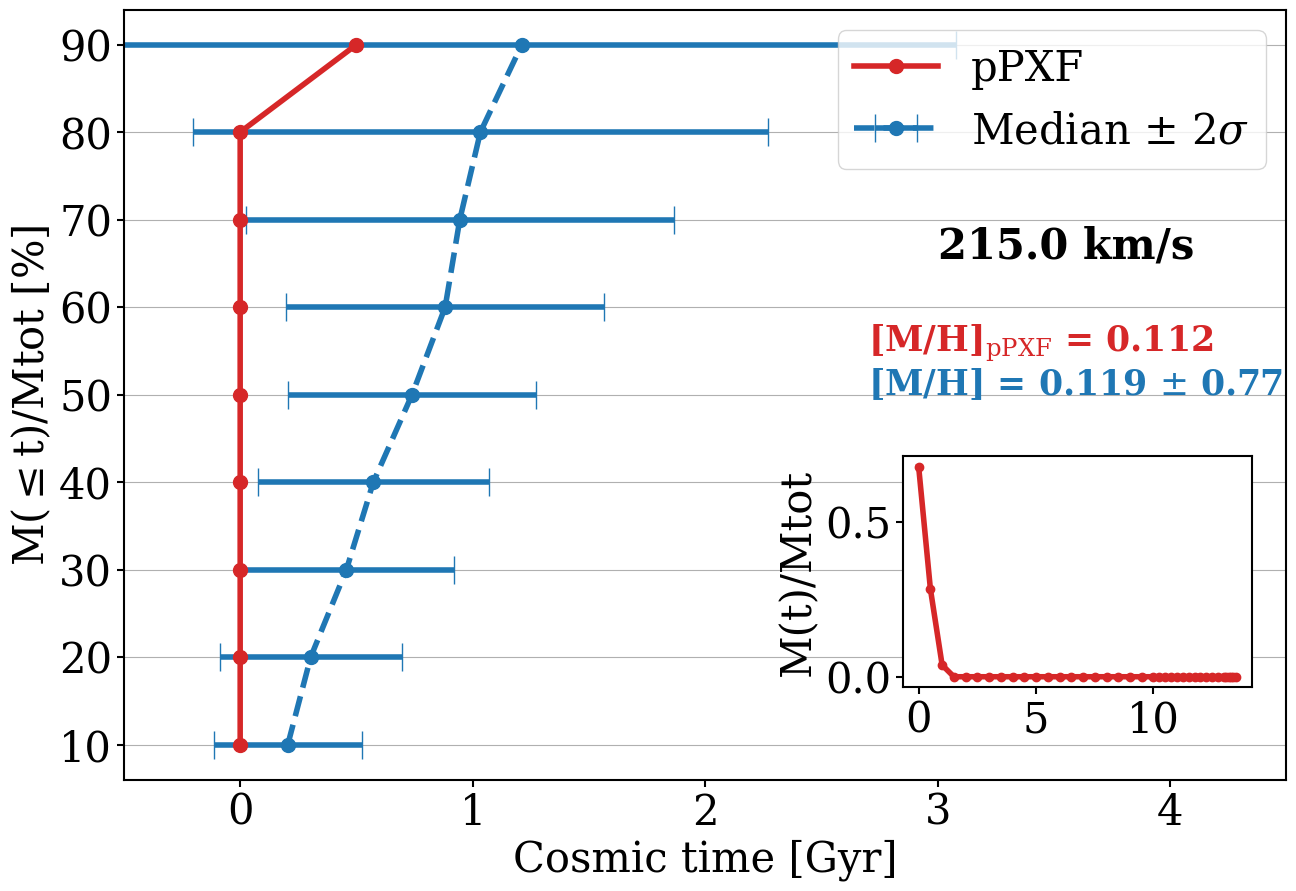

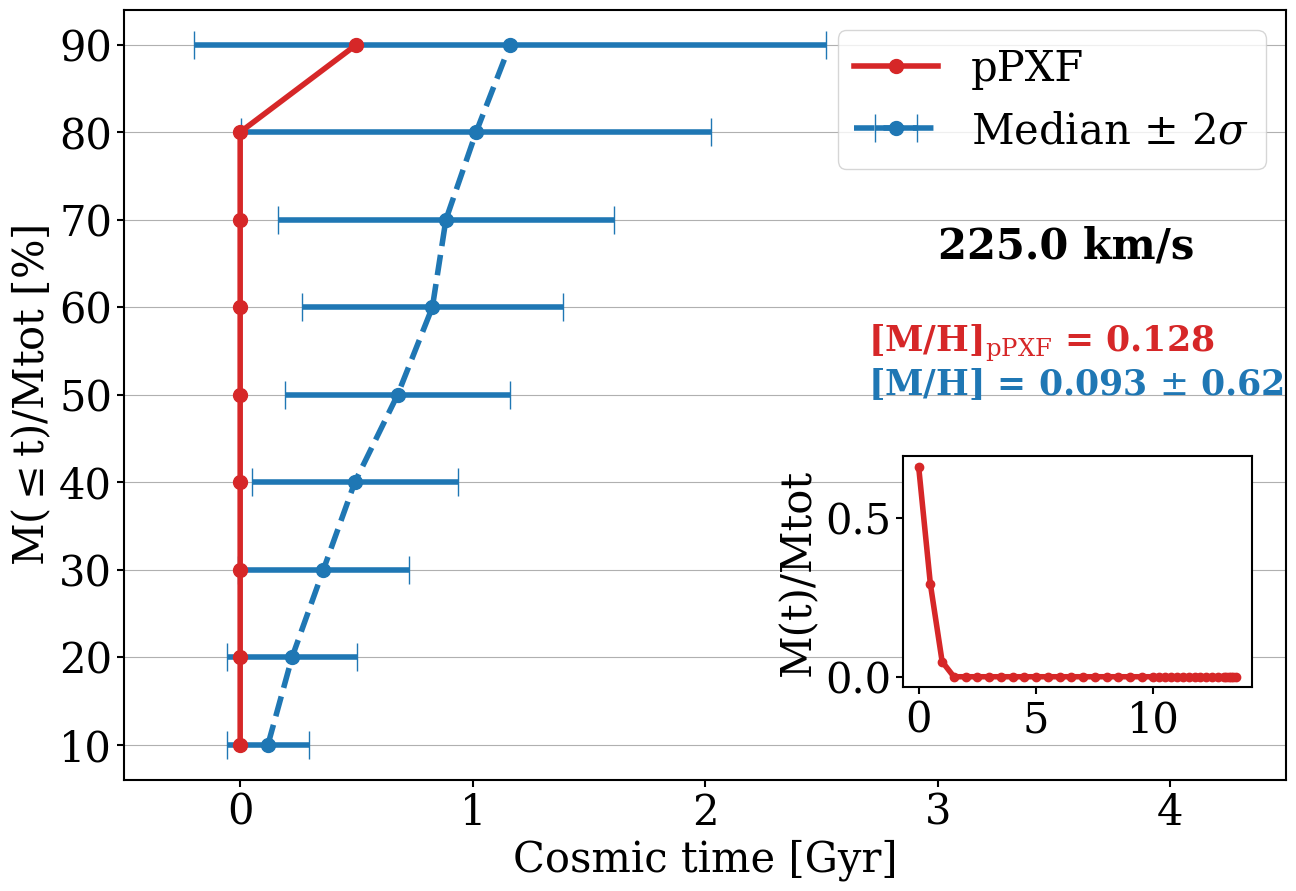

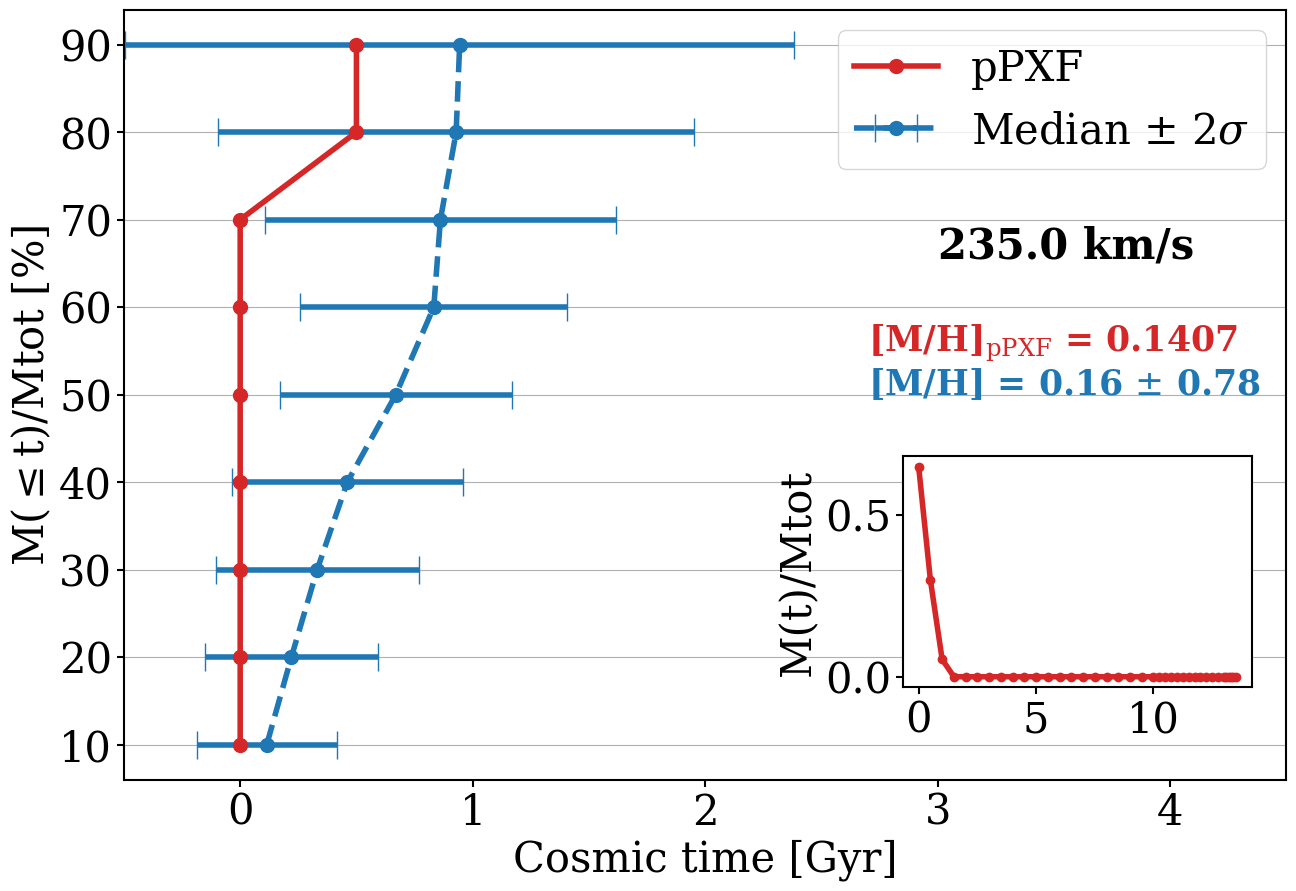

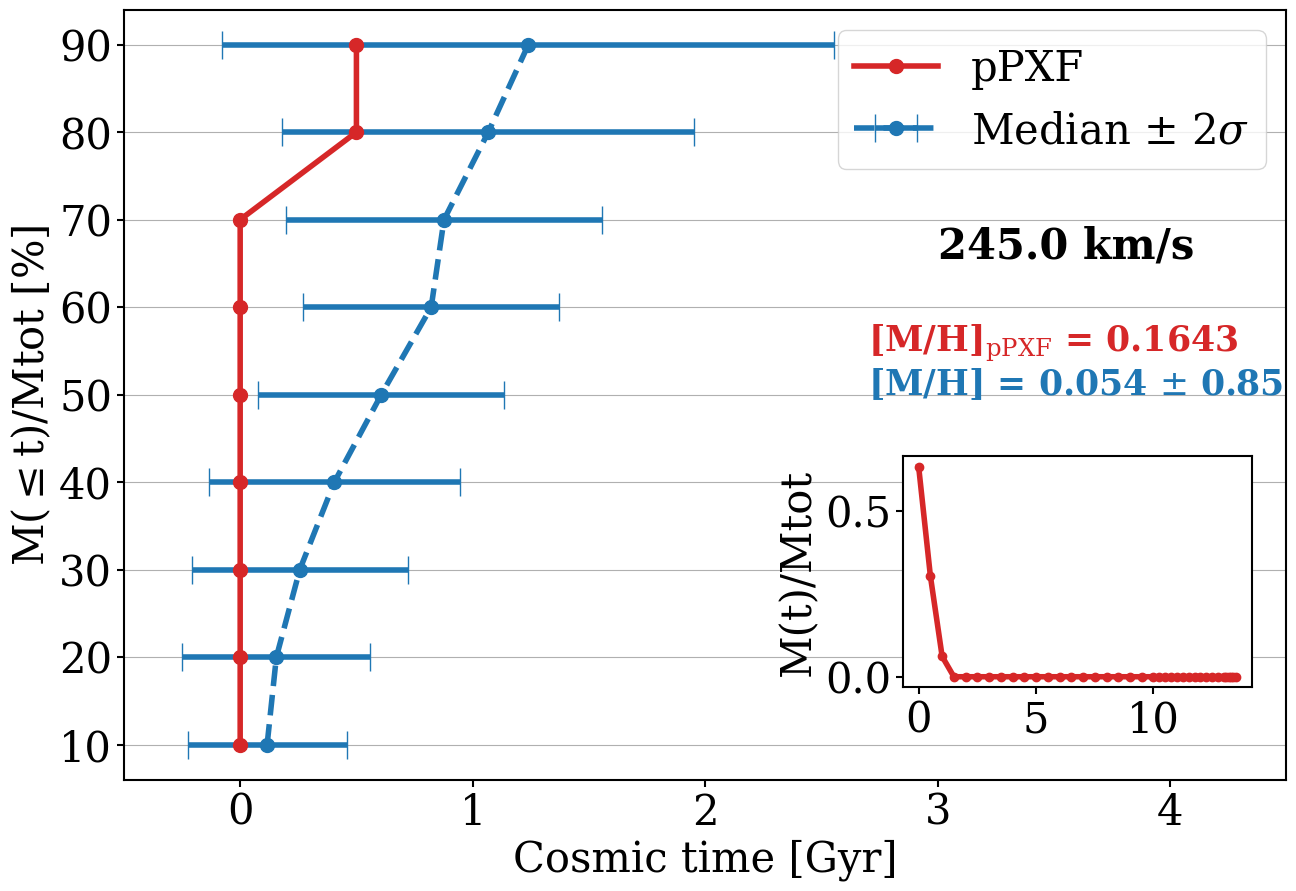

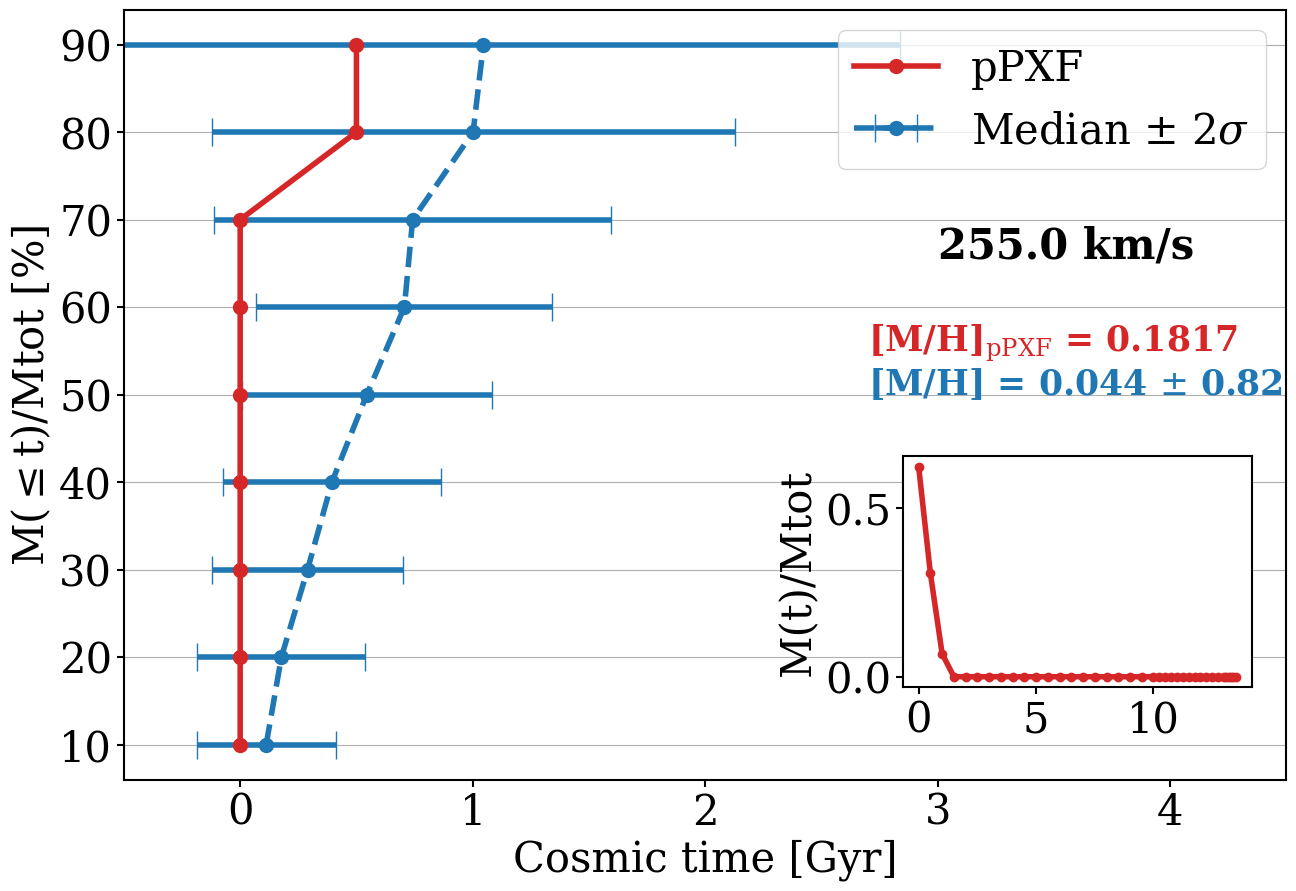

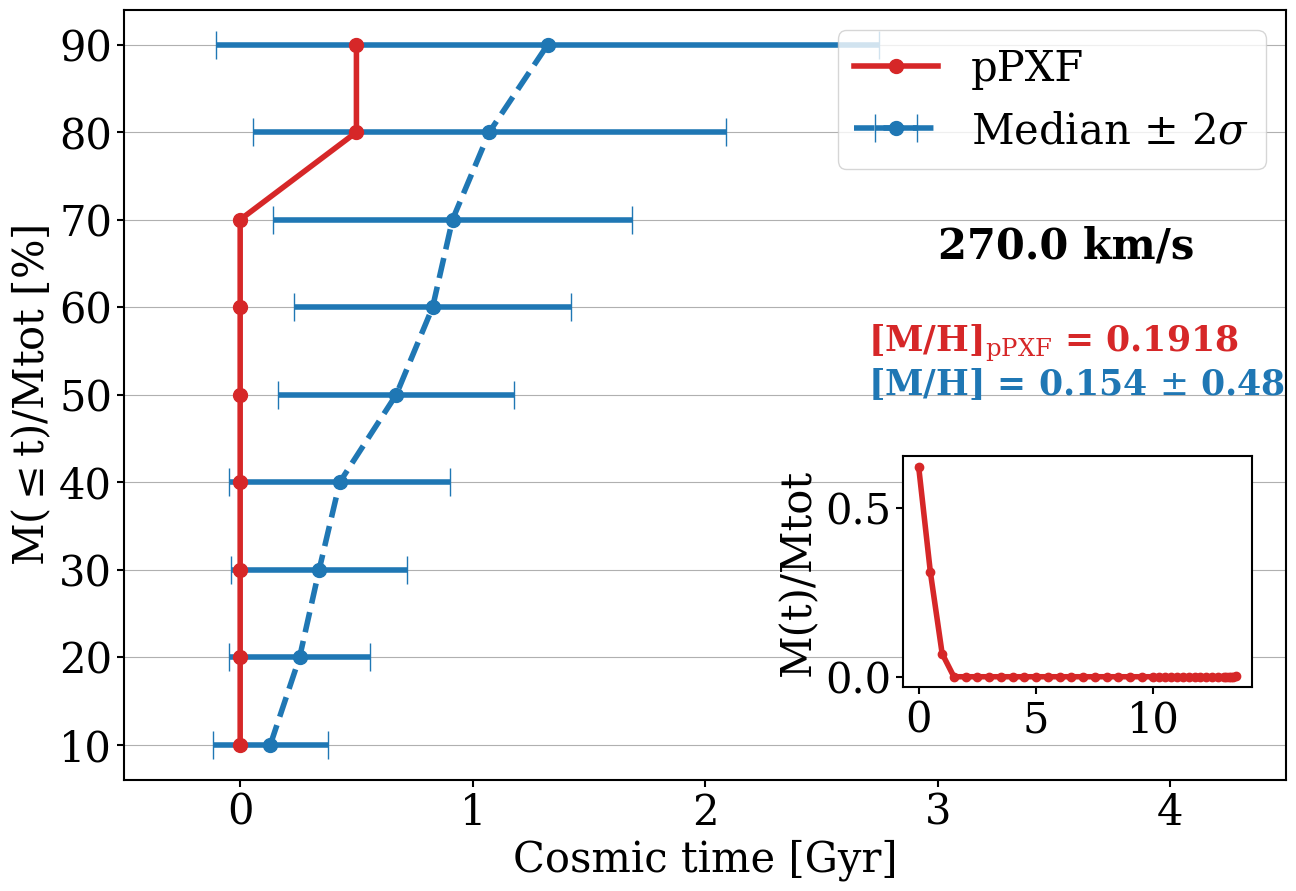

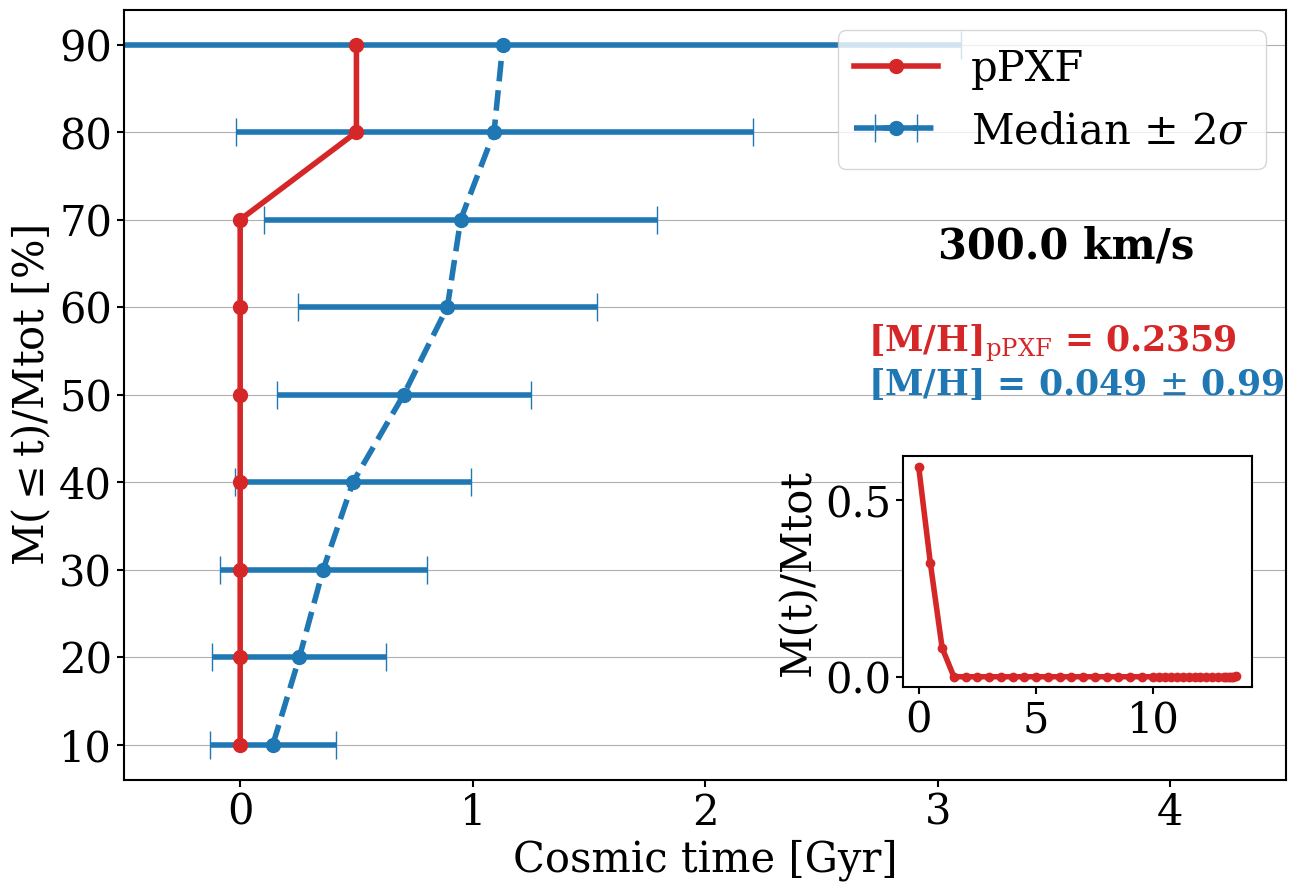

In [115]:
np.set_printoptions(precision=2,floatmode='fixed')

def plot_observations(preds_mean=post_median,preds_stds=post_stds,index_list=[0,10,17]):

    for k,j in enumerate(index_list):  
        pred_mean=preds_mean[j]
        pred_stds=preds_stds[j]

        met_ppxf=mets_ppxf[j]
        met_you=mets_you[j]
        met_you_err=mets_you_err[j] 

        fig=plt.figure()
        ax = fig.add_subplot(111)

        plt.errorbar(pred_mean[:9],np.arange(10,100,10),xerr=2*pred_stds[:9],fmt='o--',color='tab:blue',label='Median $\\pm$ 2$\\sigma$',lw=4,ms=10,capsize=10)

        plt.plot(percent_ppxf[j],np.arange(10,100,10),'-o',label='pPXF',c='tab:red',lw=4,ms=10)
        
        

        plt.legend(loc='upper right', frameon=True)
        plt.xlabel('Cosmic time [Gyr]')
        plt.ylabel('M($\leq$t)/Mtot [%]')
        
        if k==0:
            plt.text(10.1,65,str(sigma_gal[j])+' km/s',fontsize=30,weight='bold')
            plt.text(9.1,50,'[M/H] = '+str(met_you)+' $\\pm$ '+str(met_you_err),color='tab:blue',weight='bold',fontsize=25)
            plt.text(9.1,55,'[M/H]$_{\\rm{pPXF}}$ = '+str(met_ppxf),color='tab:red',weight='bold',fontsize=25)
            plt.xlim(-0.5,14.5)

            axin = ax.inset_axes([0.68, 0.12, 0.3, 0.3])


        elif k==1:

            plt.text(3.4,60,str(sigma_gal[j])+' km/s'+'\n',fontsize=30,weight='bold')
            plt.text(3.0,50,'[M/H] = '+str(met_you)+' $\\pm$ '+str(met_you_err),color='tab:blue',weight='bold',fontsize=25)
            plt.text(3.0,55,'[M/H]$_{\\rm{pPXF}}$ = '+str(met_ppxf),color='tab:red',weight='bold',fontsize=25)
            plt.xlim(-0.5,5)
            axin = ax.inset_axes([0.67, 0.12, 0.3, 0.3])


        else:
            plt.text(3.0,60,str(sigma_gal[j])+' km/s'+'\n',fontsize=30,weight='bold')
            plt.text(2.7,50,'[M/H] = '+str(met_you)+' $\\pm$ '+str(met_you_err),color='tab:blue',weight='bold',fontsize=25)
            plt.text(2.7,55,'[M/H]$_{\\rm{pPXF}}$ = '+str(met_ppxf),color='tab:red',weight='bold',fontsize=25)
            plt.xlim(-0.5,4.5)
            axin = ax.inset_axes([0.67, 0.12, 0.3, 0.3])

        plt.grid(axis='y')
        
        axin.plot(ages_ok[j],weights_ok[j],'-o',color='tab:red',lw=4)
        #axin.set_title(str(sigma_gal[j])+' km/s'+'\n',fontsize=30,weight='bold')
        #axin.set_xlabel('Cosmic Time [Gyr]')
        axin.set_ylabel('M(t)/Mtot')
        axin.set_xticks([0,5.0,10.0])
        #plt.savefig('pred_ppxf_'+str(j)+'.pdf')
        plt.show()

    

plot_observations(index_list=range(18))

In [118]:
#lets save everything for the recover spectra script


np.save('weights.npy',weights)
np.save('ages_ok.npy',ages_ok)
np.save('weights_ok.npy',weights_ok)
np.save('met.npy',met)
np.save('m_weight.npy',m_weight)
np.save('percent_ppxf.npy',percent_ppxf)
